# Modelos de Machine Learning

Curso: MBA em Ciência de Dados - Unifor

Nome: Daniel Andrade Ripardo

Matricula: 2316591

Turma: 5

## 1 - Definição dos Dados


### 1.1 -Qual o cenário em que está trabalhando?

Dados de passagens de trem no Reino Unido, de janeiro a abril de 2024

### 1.2 - Qual a problemática que está tentando resolver?

Prever se uma viagem de trem sofrerá atraso

## 2 - Processamento de dados

In [165]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [166]:
data = pd.read_csv('data/railway.csv')

In [167]:
data.columns

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request'],
      dtype='object')

In [168]:
data.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [169]:
data.value_counts()

Transaction ID           Date of Purchase  Time of Purchase  Purchase Type  Payment Method  Railcard  Ticket Class  Ticket Type  Price  Departure Station      Arrival Destination    Date of Journey  Departure Time  Arrival Time  Actual Arrival Time  Journey Status  Reason for Delay  Refund Request
ffe0ebd9-bf00-42c1-a27b  2024-01-19        18:14:41          Station        Debit Card      Adult     Standard      Advance      50     Liverpool Lime Street  London Euston          2024-01-20       17:30:00        19:45:00      20:01:00             Delayed         Technical Issue   Yes               1
0003be8d-7821-479f-b9ec  2024-02-16        18:10:42          Station        Debit Card      Adult     Standard      Advance      56     Manchester Piccadilly  London Euston          2024-02-23       17:30:00        19:20:00      19:32:00             Delayed         Technical Issue   Yes               1
faf1f87c-c958-4805-8e07  2024-04-24        14:52:21          Station        Debit Card      S

In [170]:
# Criando features com base no tempo 
data['Date of Journey'] = pd.to_datetime(data['Date of Journey'])
data['Day of Week'] = data['Date of Journey'].dt.dayofweek
data['Is Weekend'] = data['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

In [171]:
# Calculando duração de atraso (se 'Actual Arrival' é depois de 'Arrival Time')
data['Scheduled Arrival Time'] = pd.to_datetime(data['Arrival Time'])
data['Actual Arrival Time'] = pd.to_datetime(data['Actual Arrival Time'])
data['Delay Duration (min)'] = (data['Actual Arrival Time'] - data['Scheduled Arrival Time']).dt.total_seconds() / 60
data['Is Delayed'] = data['Delay Duration (min)'].apply(lambda x: 1 if x > 0 else 0)

/tmp/ipykernel_7426/1904627052.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Scheduled Arrival Time'] = pd.to_datetime(data['Arrival Time'])
/tmp/ipykernel_7426/1904627052.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Actual Arrival Time'] = pd.to_datetime(data['Actual Arrival Time'])


In [172]:
# Realiando encode de features categoricas 
le = LabelEncoder()
data['Departure Station Encoded'] = le.fit_transform(data['Departure Station'])
data['Arrival Destination Encoded'] = le.fit_transform(data['Arrival Destination'])
data['Ticket Class Encoded'] = le.fit_transform(data['Ticket Class'])

## 3 - Análise exploratória dos dados

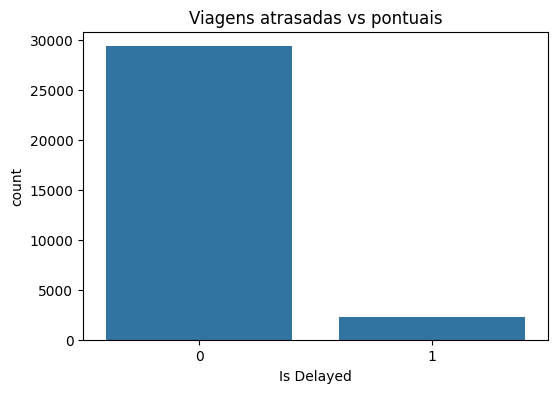

In [173]:
# Distribuição de atraso
plt.figure(figsize=(6, 4))
sns.countplot(x='Is Delayed', data=data)
plt.title('Viagens atrasadas vs pontuais')
plt.show()

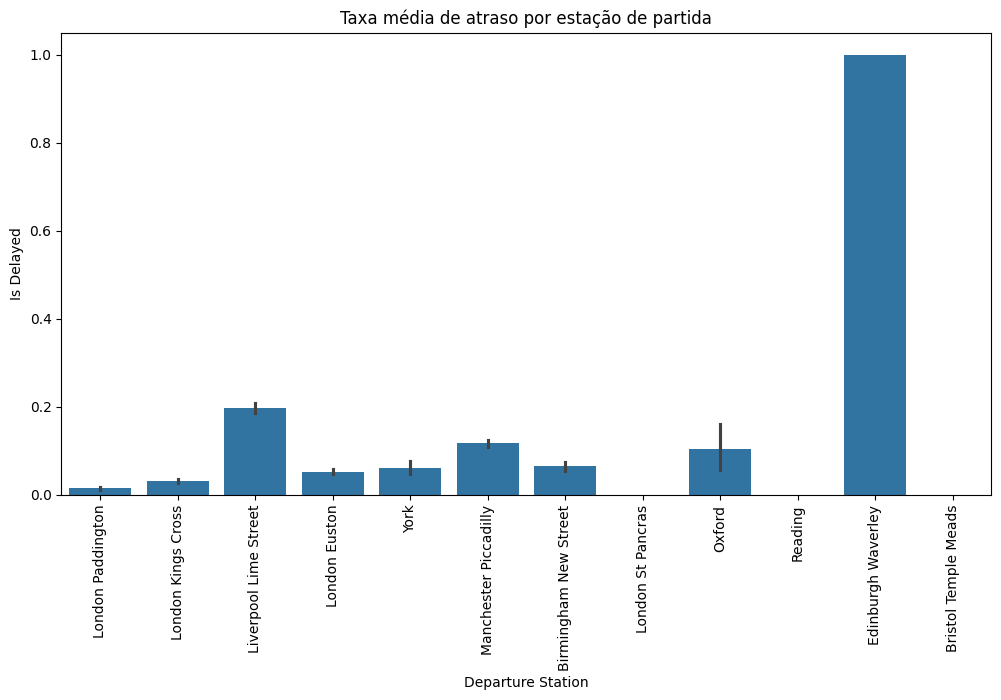

In [174]:
# Analise por estação
plt.figure(figsize=(12, 6))
sns.barplot(x='Departure Station', y='Is Delayed', data=data, estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Taxa média de atraso por estação de partida')
plt.show()

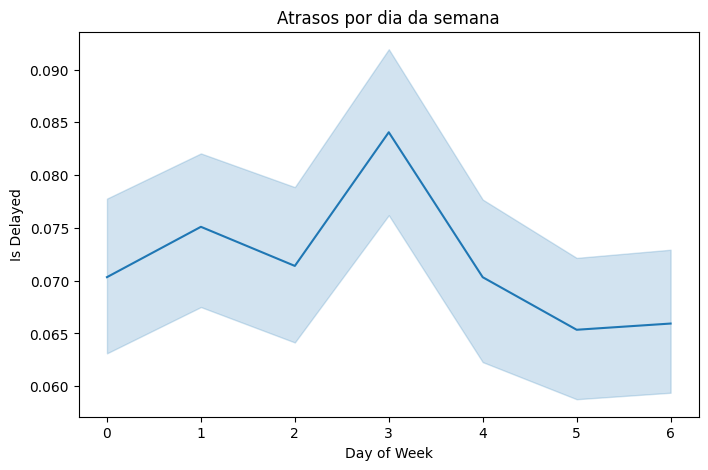

In [175]:
# Padrões com base no dia da semana
plt.figure(figsize=(8, 5))
sns.lineplot(x='Day of Week', y='Is Delayed', data=data)
plt.title('Atrasos por dia da semana')
plt.show()

## 4 - Seleção de Features

In [176]:
# Definição das features analisadas e a target 
X = data[['Departure Station Encoded', 'Arrival Destination Encoded', 'Day of Week', 'Is Weekend']]
y = data['Is Delayed']

# Separando dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5 - Modelagem

In [177]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print(f"---{model_name}---")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("\n")

In [184]:
# Treinando Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# treinando Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# treinando Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# treinando Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

In [185]:
# Avaliação dos modelos
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

---Logistic Regression---
MAE: 0.0713947243721371
MSE: 0.0713947243721371
RMSE: 0.2671979123648557


---Decision Tree---
MAE: 0.051650608118780604
MSE: 0.051650608118780604
RMSE: 0.22726770144211123


---Random Forest---
MAE: 0.051966513978834304
MSE: 0.051966513978834304
RMSE: 0.22796165023712717


---Gradient Boosting---
MAE: 0.05054493760859264
MSE: 0.05054493760859264
RMSE: 0.22482201317618486




### 6 - Demonstrando utilização de hiperparametros para tentar alcançar um melhor resultado

In [183]:
# Definindo o grid de parametros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Iniciando o modelo
gb = GradientBoostingClassifier(random_state=42)

# Usando StratifiedKFold para gerenciar melhor dados não balanceados
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurando GridSearchCV com os dados estratificados do K-fold
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=cv, scoring='accuracy')


grid_search.fit(X_train, y_train)

# resultados encontrados
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")


Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy: 0.9489771360933457


In [181]:
# retreinando o  Gradient Boosting Classifier
gb_grid_search_model = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)
gb_grid_search_model.fit(X_train, y_train)
y_pred_gb_grid_search = gb_grid_search_model.predict(X_test)

evaluate_model(y_test, y_pred_gb_grid_search, "Gradient Boosting com hiperparametros")

# retreinando o Gradient Boosting Classifier com early stopping
gb_gs_early_stopping_model = GradientBoostingClassifier(**grid_search.best_params_, random_state=42, n_iter_no_change=10, validation_fraction=0.2)
gb_gs_early_stopping_model.fit(X_train, y_train)
y_pred_gb_gs_early_stopping = gb_gs_early_stopping_model.predict(X_test)

evaluate_model(y_test, y_pred_gb_gs_early_stopping, "Gradient Boosting com hiperparametros and early stopping")

---Gradient Boosting com hiperparametros---
MAE: 0.051650608118780604
MSE: 0.051650608118780604
RMSE: 0.22726770144211123


---Gradient Boosting com hiperparametros and early stopping---
MAE: 0.051650608118780604
MSE: 0.051650608118780604
RMSE: 0.22726770144211123




### 7 - Exibindo o melhor resultado

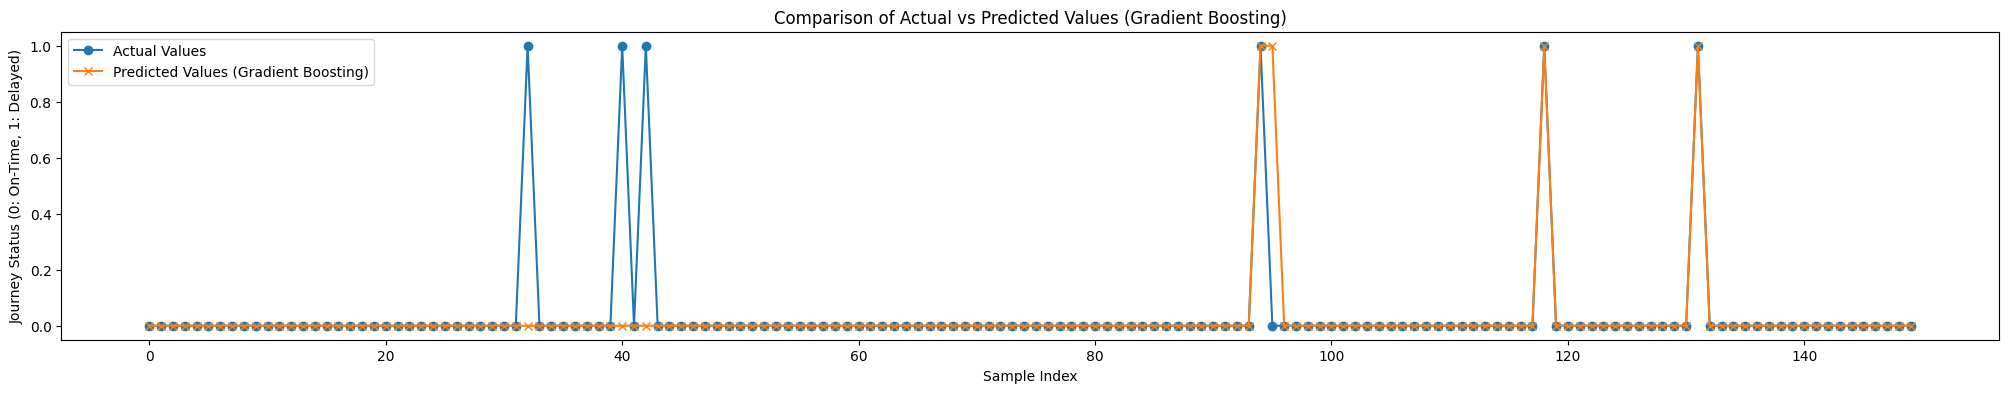

In [182]:
plt.figure(figsize=(25, 4))

plt.plot(y_test.values[:150], label="Actual Values", marker='o')

plt.plot(y_pred_decision_tree[:150], label="Predicted Values (Gradient Boosting)", marker='x')

plt.title("Comparison of Actual vs Predicted Values (Gradient Boosting)")
plt.xlabel("Sample Index")
plt.ylabel("Journey Status (0: On-Time, 1: Delayed)")
plt.legend()

plt.show()